# LMMs: Large Multimodal Models with Image

🤖 In this introductory notebook, we explore the capabilities of Gemini large multimodal models, which excel in understanding content across various modalities, including images and text. This code demonstrates how to use Gemini to describe images accurately, ask insightful questions, and receive detailed answers. Additionally, it highlights the model’s advanced reasoning abilities, showcasing its potential in complex problem-solving scenarios.
Whether you’re a developer, researcher, or enthusiast, this guide provides a comprehensive overview of leveraging Gemini’s powerful features for diverse applications.

By: [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)

## Install

In [1]:
!pip install -q -U google-generativeai

## LLM

In [2]:
import google.generativeai as genai
import PIL.Image
import os
from IPython.display import Markdown, display

In [3]:
# Run this cell and paste the API key in the prompt
import os
import getpass
os.environ['GOOGLE_API_KEY'] = getpass.getpass('Gemini API Key:')

Gemini API Key:··········


In [4]:
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [5]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827


In [6]:
# download an image
!wget -O sampleimg.jpg https://s100.iracing.com/wp-content/uploads/2023/11/copy.jpg

--2024-08-31 20:44:06--  https://s100.iracing.com/wp-content/uploads/2023/11/copy.jpg
Resolving s100.iracing.com (s100.iracing.com)... 18.172.170.126, 18.172.170.95, 18.172.170.93, ...
Connecting to s100.iracing.com (s100.iracing.com)|18.172.170.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416866 (407K) [image/jpeg]
Saving to: ‘sampleimg.jpg’

sampleimg.jpg       100%[===================>] 407.10K  --.-KB/s    in 0.03s   

2024-08-31 20:44:06 (13.0 MB/s) - ‘sampleimg.jpg’ saved [416866/416866]



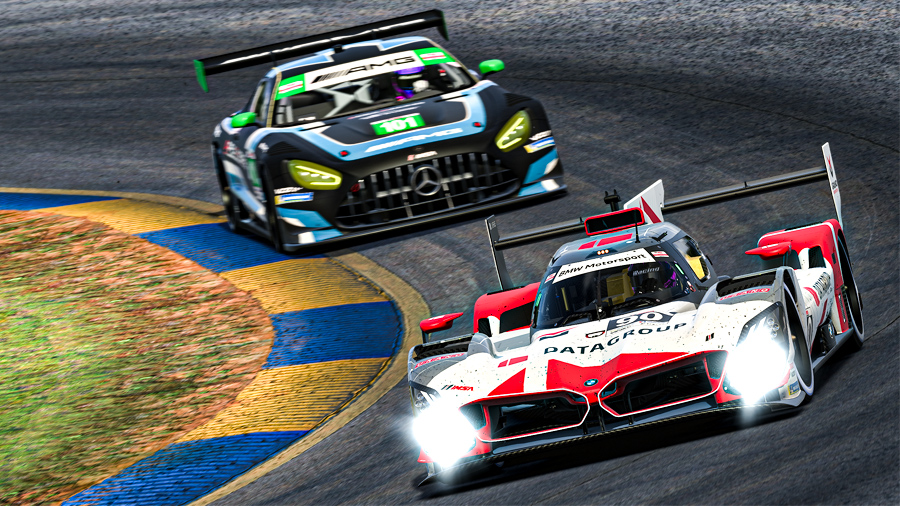

In [7]:
img = PIL.Image.open('/content/sampleimg.jpg')
display(img)

In [8]:
model = genai.GenerativeModel(model_name="gemini-1.5-flash")
response = model.generate_content(["What is in this photo?", img])

In [9]:
Markdown(response.text)

The photo shows two race cars on a track. The car in the foreground is a white BMW with red and black accents. The car in the background is a blue and black Mercedes AMG. The BMW is in the lead and is about to pass the Mercedes. The photo is taken from a low angle, giving the viewer a good view of the cars and the track.

## Ask and rerason

In [10]:
mm_prompt = ["Based on the photo, which brand is fasrer? explain your answer", img]
Markdown(model.generate_content(mm_prompt).text)

The BMW is faster. It is closer to the camera and has a more pronounced blur effect, indicating it is moving faster than the Mercedes.  


In [11]:
mm_prompt = [img, "Based on the photo, which brand is fasrer? explain your answer"]
Markdown(model.generate_content(mm_prompt).text)

It is impossible to tell which brand is faster based solely on a still image.  While the BMW appears to be passing the Mercedes, this could be a temporary situation due to track position or a strategy play. 


## Generation Config

In [12]:
from google.generativeai.types import GenerationConfig

In [13]:
# Creative model
g_config1 = GenerationConfig(
    temperature = 0.85,
    top_p = 0.8
)

# Precise or consistent model
g_config2 = GenerationConfig(
    temperature = 0.0,
    top_k = 1
)

In [14]:
mm_prompt = ["Based on the photo, which brand is fasrer? explain your answer", img]
Markdown(model.generate_content(mm_prompt, generation_config=g_config1).text)

The BMW is faster. It is overtaking the Mercedes AMG on the track.  The BMW is closer to the camera, meaning it is closer to the viewer. The Mercedes AMG is in the background, implying that it is further away. This suggests that the BMW is passing the Mercedes AMG, indicating that it is moving faster.

In [15]:
# should expect different output
mm_prompt = ["Based on the photo, which brand is fasrer? explain your answer", img]
Markdown(model.generate_content(mm_prompt, generation_config=g_config1).text)

The BMW is faster because it is passing the Mercedes-AMG.  The BMW is in the lead and the Mercedes-AMG is behind. 


In [16]:
mm_prompt = ["Based on the photo, which brand is fasrer? explain your answer", img]
Markdown(model.generate_content(mm_prompt, generation_config=g_config2).text)

The BMW is faster. It is overtaking the Mercedes-AMG.  The BMW is closer to the camera, which means it is closer to the viewer and therefore moving faster.

In [17]:
# should expect almost same output
mm_prompt = ["Based on the photo, which brand is fasrer? explain your answer", img]
Markdown(model.generate_content(mm_prompt, generation_config=g_config2).text)

The BMW is faster. It is overtaking the Mercedes-AMG.  The BMW is closer to the camera, which means it is closer to the viewer and therefore moving faster.

## Complex scenarios

### Total price

In [41]:
!wget -O prices.jpg http://capreform.eu/wp-content/uploads/2015/10/food_prices_decline-1.jpg

--2024-08-31 20:23:54--  http://capreform.eu/wp-content/uploads/2015/10/food_prices_decline-1.jpg
Resolving capreform.eu (capreform.eu)... 92.205.15.114
Connecting to capreform.eu (capreform.eu)|92.205.15.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166469 (163K) [image/jpeg]
Saving to: ‘prices.jpg’

prices.jpg          100%[===================>] 162.57K   502KB/s    in 0.3s    

2024-08-31 20:23:55 (502 KB/s) - ‘prices.jpg’ saved [166469/166469]



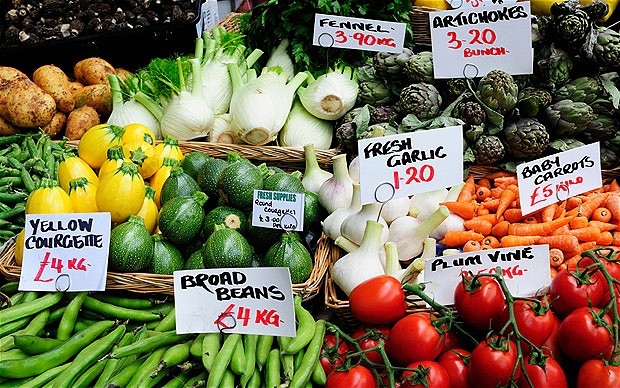

In [42]:
img = PIL.Image.open('/content/prices.jpg')
display(img)

In [53]:
prompt1 = """
Based on the photo, I want to make food that consistes of:
1) 0.5 KG of Yellow Courgette
2) 0.25 KG of Fresh Garlic
3) 1.25 KG of Baby Carrots
"""

prompt2 = """
Caluclate the totoal price of the food.
Explain your answer in detail.
"""
mm_prompt = [prompt1, img, prompt2]
Markdown(model.generate_content(mm_prompt, generation_config=g_config2).text)

The total price of the food is £10.20. 

Here's how we calculated that:

* **Yellow Courgette:** 0.5 kg at £4/kg = £2.00
* **Fresh Garlic:** 0.25 kg at £1.20/kg = £0.30
* **Baby Carrots:** 1.25 kg at £5/kg = £6.25

Total: £2.00 + £0.30 + £6.25 = £8.55

Therefore, the total price of the food is £8.55.

### Generate post from image

In [19]:
!wget -O object.jpg https://ai.google.dev/static/gemini-api/docs/images/image_prompt.png

--2024-08-31 20:45:50--  https://ai.google.dev/static/gemini-api/docs/images/image_prompt.png
Resolving ai.google.dev (ai.google.dev)... 108.177.98.113, 108.177.98.139, 108.177.98.102, ...
Connecting to ai.google.dev (ai.google.dev)|108.177.98.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414778 (405K) [image/jpeg]
Saving to: ‘object.jpg’

object.jpg          100%[===================>] 405.06K  1.99MB/s    in 0.2s    

2024-08-31 20:45:50 (1.99 MB/s) - ‘object.jpg’ saved [414778/414778]



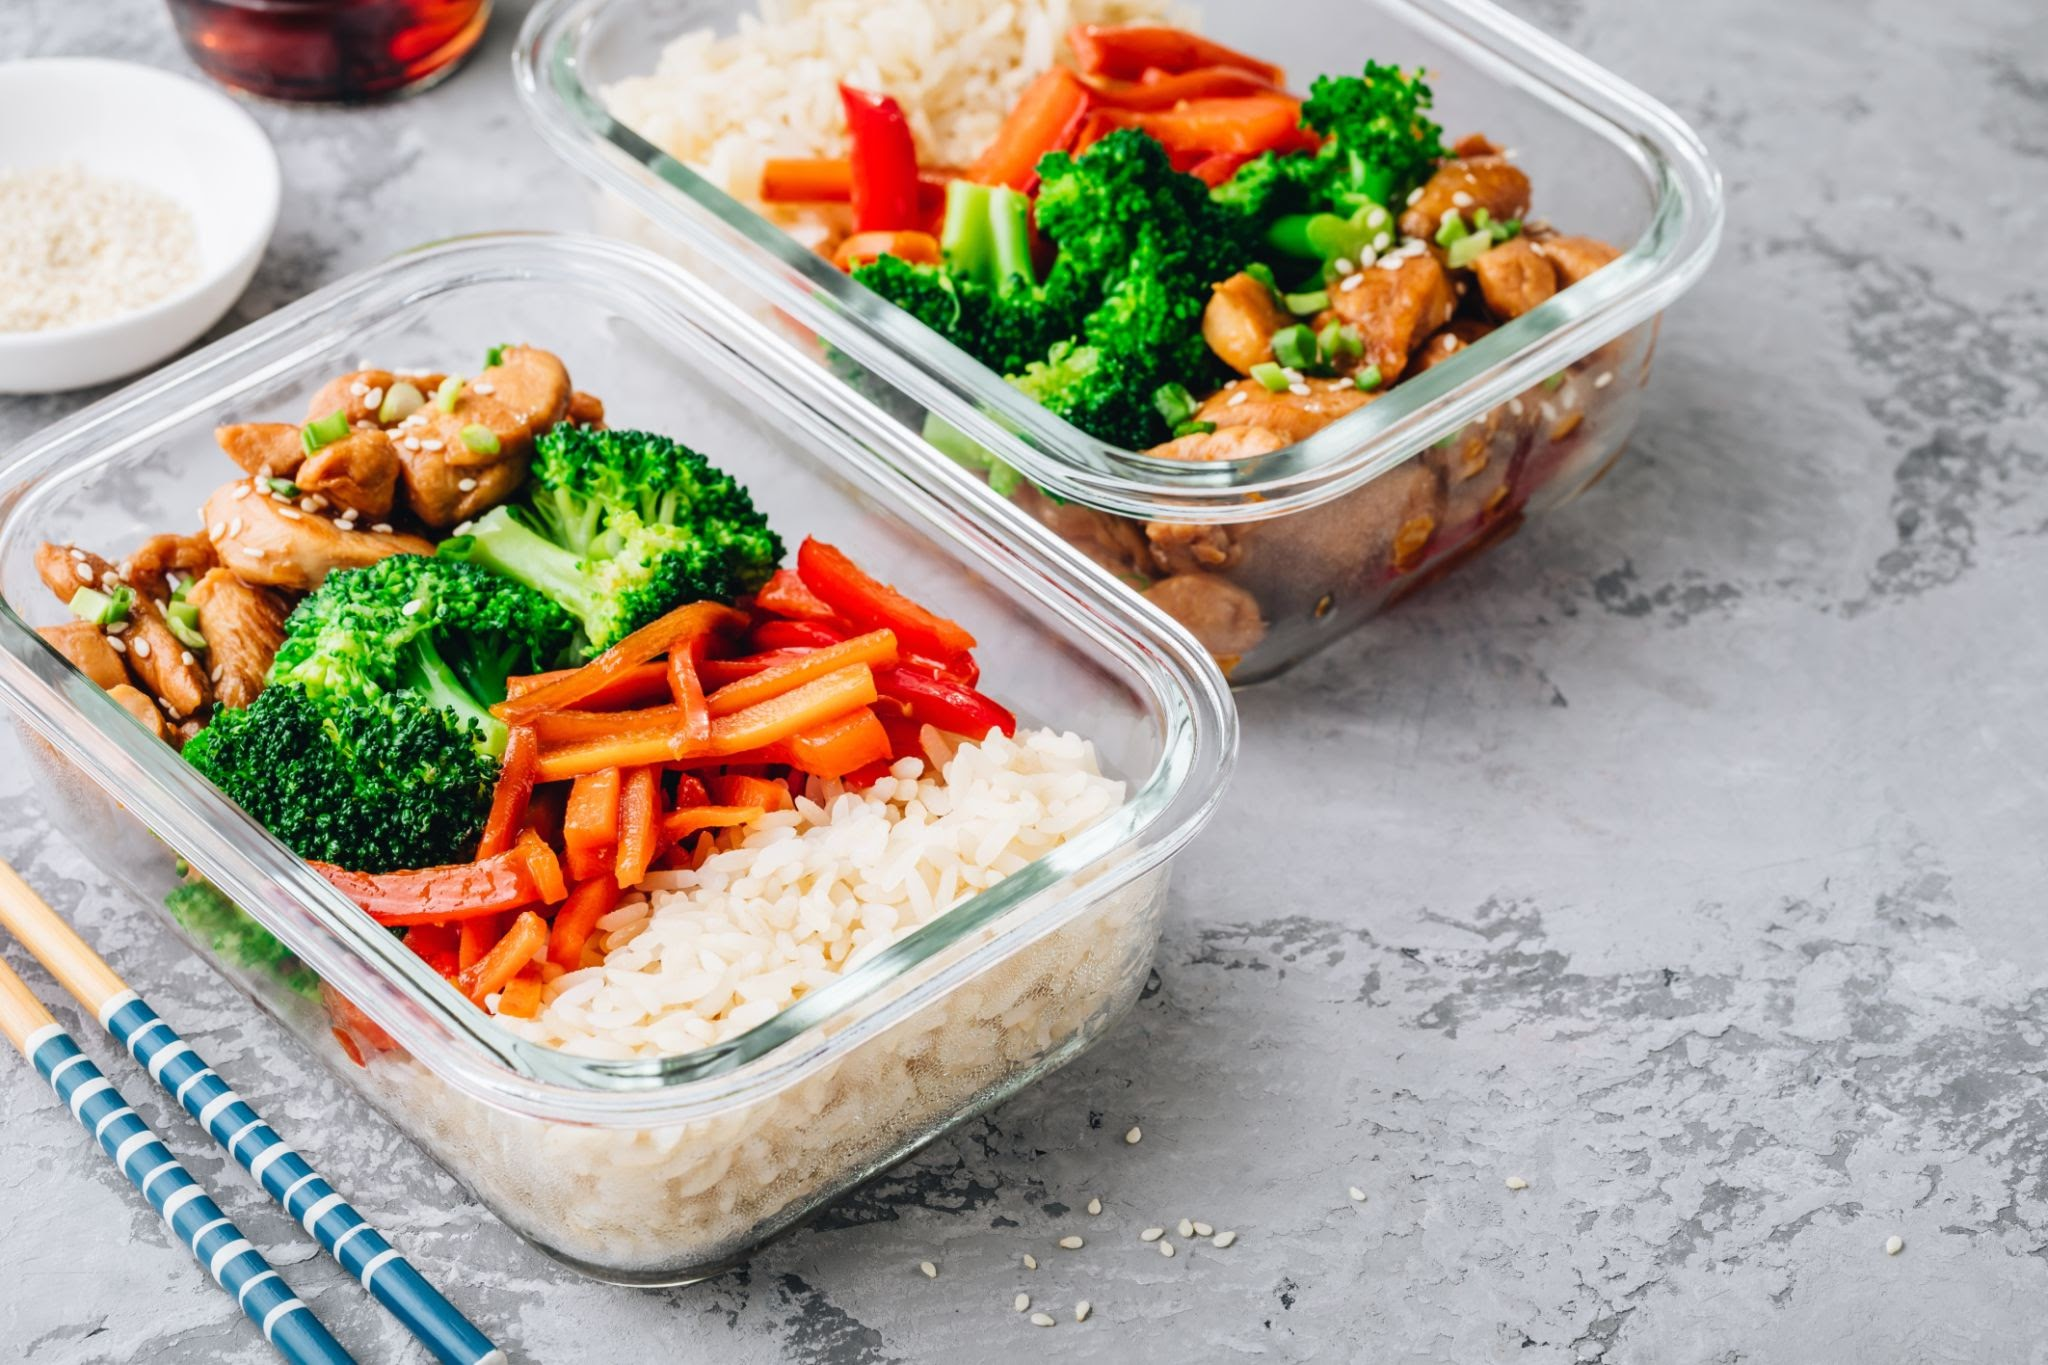

In [20]:
# https://ai.google.dev/gemini-api/docs/file-prompting-strategies
img = PIL.Image.open('/content/object.jpg')
display(img)

In [21]:
prompt1 = """
Write a short, engaging blog post based on the picture.
"""

prompt2 = """
It should include a description of the meal in the photo and talk about my journey meal prepping.
"""
mm_prompt = [prompt1, img, prompt2]
Markdown(model.generate_content(mm_prompt, generation_config=g_config2).text)

## Meal Prep Monday: Teriyaki Chicken & Veggies

This week, I'm all about meal prepping! It's a game-changer for staying on track with healthy eating and saving time during the week. This week's meal prep star is this delicious teriyaki chicken and veggie bowl. 

I love how versatile meal prepping is. You can customize it to your liking, and it's a great way to get creative in the kitchen. This bowl is packed with protein from the teriyaki chicken, fiber from the broccoli and carrots, and complex carbs from the brown rice. It's a complete meal in a container, perfect for taking to work or school. 

I'm excited to see how this week's meal prep journey goes! What are your favorite meal prep recipes? Share them in the comments below! 


### Image analysis in JSON

In [22]:
!wget -O dish.jpg https://ai.google.dev/static/gemini-api/docs/images/spanish-meal.png

--2024-08-31 20:49:27--  https://ai.google.dev/static/gemini-api/docs/images/spanish-meal.png
Resolving ai.google.dev (ai.google.dev)... 74.125.197.100, 74.125.197.139, 74.125.197.113, ...
Connecting to ai.google.dev (ai.google.dev)|74.125.197.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584194 (571K) [image/png]
Saving to: ‘dish.jpg’

dish.jpg            100%[===================>] 570.50K  2.93MB/s    in 0.2s    

2024-08-31 20:49:27 (2.93 MB/s) - ‘dish.jpg’ saved [584194/584194]



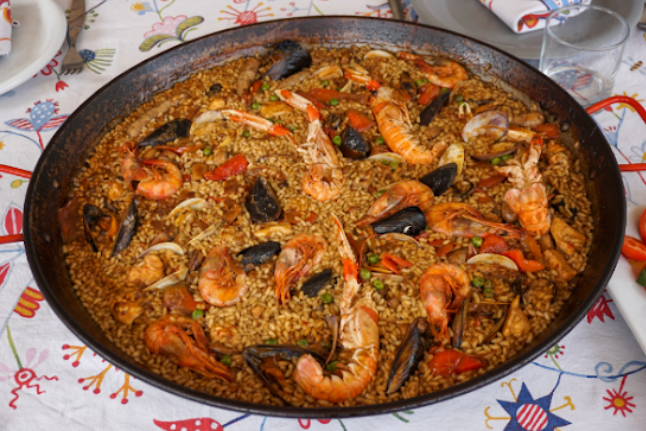

In [23]:
img = PIL.Image.open('/content/dish.jpg')
display(img)

In [25]:
prompt1 = """
Provide a list of all the following attributes
ingredients, type of cuisine, vegetarian or not, in JSON format
"""

mm_prompt = [img, prompt1]
model.generate_content(mm_prompt, generation_config=g_config2).text

'{"ingredients": ["rice", "shrimp", "mussels", "clams", "peas", "chicken", "saffron"], "type of cuisine": ["spanish"], "vegetarian or not": ["no"]}'

### Multi image reasoning

In [26]:
!wget -O img01.jpg https://ai.google.dev/static/gemini-api/docs/images/packing.jpg
!wget -O img02.jpg https://ai.google.dev/static/gemini-api/docs/images/mall.jpg
!wget -O img03.jpg https://ai.google.dev/static/gemini-api/docs/images/toilet-paper.jpg

--2024-08-31 20:54:17--  https://ai.google.dev/static/gemini-api/docs/images/packing.jpg
Resolving ai.google.dev (ai.google.dev)... 172.253.117.100, 172.253.117.102, 172.253.117.101, ...
Connecting to ai.google.dev (ai.google.dev)|172.253.117.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60619 (59K) [image/jpeg]
Saving to: ‘img01.jpg’

img01.jpg           100%[===================>]  59.20K  --.-KB/s    in 0.06s   

2024-08-31 20:54:18 (913 KB/s) - ‘img01.jpg’ saved [60619/60619]

--2024-08-31 20:54:18--  https://ai.google.dev/static/gemini-api/docs/images/mall.jpg
Resolving ai.google.dev (ai.google.dev)... 172.253.117.100, 172.253.117.102, 172.253.117.101, ...
Connecting to ai.google.dev (ai.google.dev)|172.253.117.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35436 (35K) [image/jpeg]
Saving to: ‘img02.jpg’

img02.jpg           100%[===================>]  34.61K  --.-KB/s    in 0.009s  

2024-08-31 20:54:18 (3.86 MB/s) - ‘

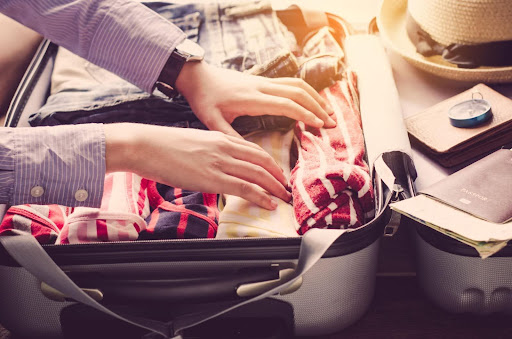

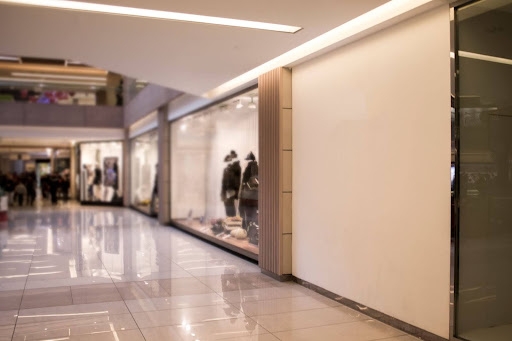

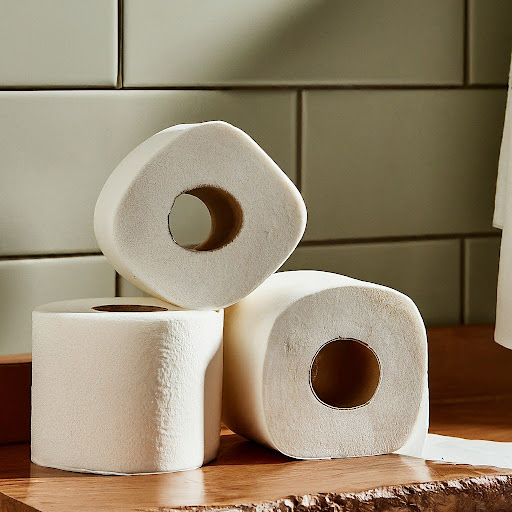

In [27]:
img01 = PIL.Image.open('/content/img01.jpg')
display(img01)
img02 = PIL.Image.open('/content/img02.jpg')
display(img02)
img03 = PIL.Image.open('/content/img03.jpg')
display(img03)

In [30]:
prompt1 = """
What is in common between these images? Refer to what's in the images in your response.
"""
mm_prompt = [img01, img02, img03, prompt1]
Markdown(model.generate_content(mm_prompt).text)

All of the images show the process of preparing for a trip. The first image shows someone packing a suitcase, the second image shows a shopping mall where a traveler could buy items for their trip, and the third image shows toilet paper which is a useful item to have when traveling. 
